In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.ticker import PercentFormatter

In [2]:
df_olympics = pd.read_csv("/Users/Selim/Downloads/GUC/Semester 9/Data Engineering/Projects/Milestone1/athlete_events.csv")
df_olympics.head()
#Propose 5 questions to answer in future milestones: We can answer them now but don't need to

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


Checking the shape of the dataframe:

In [3]:
df_olympics.shape

(271116, 15)

Viewing All columns and their datatypes:

In [4]:
print(df_olympics.columns.tolist())
df_olympics.dtypes

['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games', 'Year', 'Season', 'City', 'Sport', 'Event', 'Medal']


ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object

Checking basic information like the number of Non-null values in columns and their datatype

In [5]:
df_olympics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


Checking the Descriptive statistics of the data:

In [6]:
df_olympics.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [7]:
df_olympics.describe(include=['object'])

,Name,Sex,Team,NOC,Games,Season,City,Sport,Event,Medal
count,271116,271116,271116,271116,271116,271116,271116,271116,271116,39783
unique,134732,2,1184,230,51,2,42,66,765,3
top,Robert Tait McKenzie,M,United States,USA,2000 Summer,Summer,London,Athletics,Football Men's Football,Gold
freq,58,196594,17847,18853,13821,222552,22426,38624,5733,13372


Checking how many null values exist in the dataset and their percentages:

In [8]:
df_olympics.isna().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [9]:
df_olympics.isna().sum()/df_olympics.shape[0]

ID        0.000000
Name      0.000000
Sex       0.000000
Age       0.034944
Height    0.221938
Weight    0.231912
Team      0.000000
NOC       0.000000
Games     0.000000
Year      0.000000
Season    0.000000
City      0.000000
Sport     0.000000
Event     0.000000
Medal     0.853262
dtype: float64

How does the number of athletes change throughout the years ?

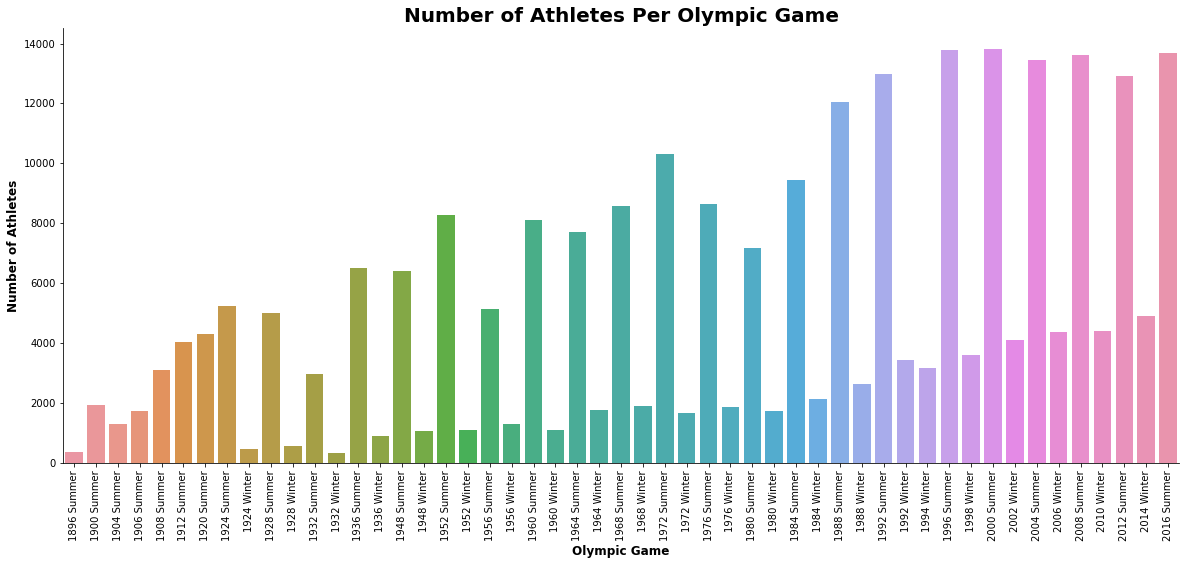

In [10]:
plt.figure(figsize=(20,8))
sns.barplot(x = (df_olympics.groupby(['Games'])['ID'].count()).index, y = df_olympics.groupby(['Games'])['ID'].count())
plt.xlabel('Olympic Game')
plt.xticks(rotation = 90, )
plt.ylabel('Number of Athletes', fontsize=12, weight="bold")
plt.title('Number of Athletes Per Olympic Game', fontsize = 20, fontweight="bold")
plt.xlabel("Olympic Game", fontsize=12, weight="bold")
sns.despine()
plt.show()

How many athletes are in every sport ?

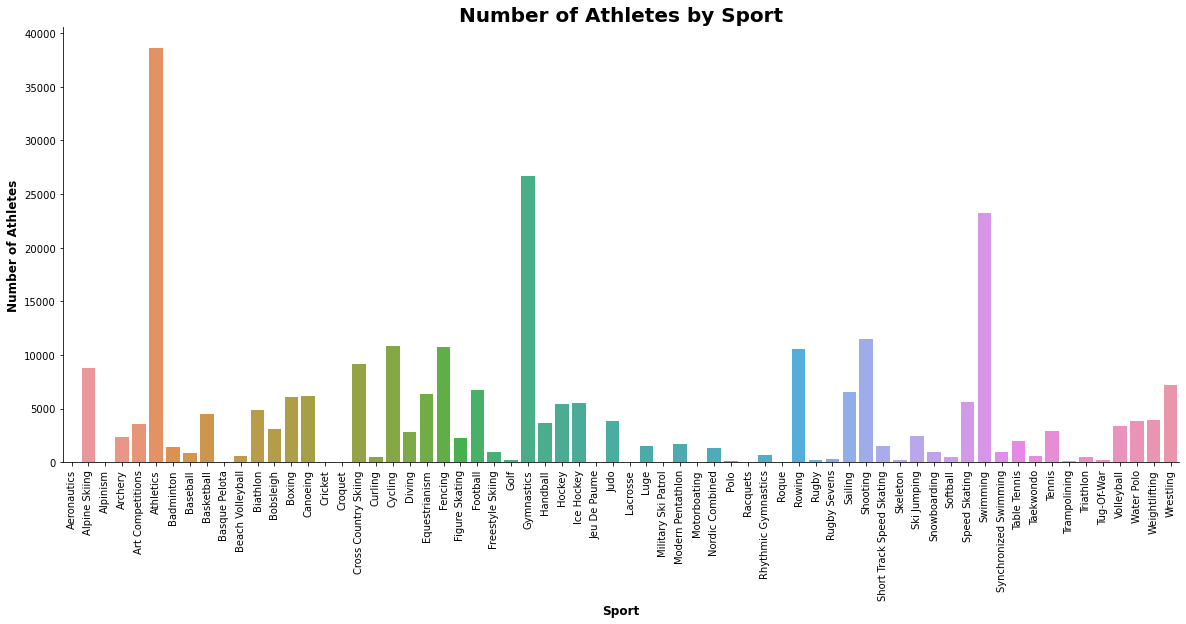

In [11]:
plt.figure(figsize=(20,8))
sns.barplot(x = (df_olympics.groupby(['Sport'])['ID'].count()).index, y = df_olympics.groupby(['Sport'])['ID'].count())
plt.xlabel('Sport')
plt.xticks(rotation = 90, )
plt.ylabel('Number of Athletes', fontsize=12, weight="bold")
plt.title('Number of Athletes by Sport', fontsize = 20, fontweight="bold")
plt.xlabel("Sport", fontsize=12, weight="bold")
sns.despine()
plt.show()

How many Males and Females that played in the olympics ?

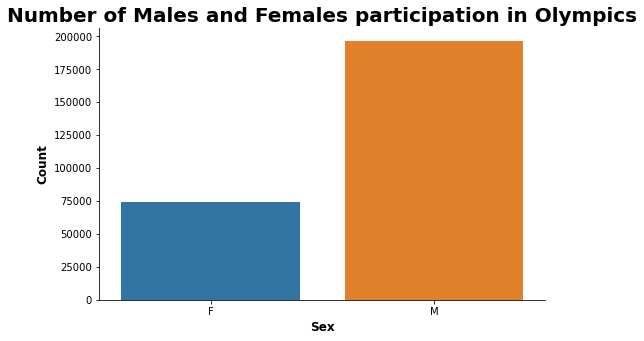

In [12]:
plt.figure(figsize=(8,5))
sns.barplot(x = (df_olympics.groupby(["Sex"])["ID"].count()).index, y = df_olympics.groupby(["Sex"])["ID"].count())
plt.ylabel('Count', fontsize=12, weight="bold")
plt.title('Number of Males and Females participation in Olympics', fontsize = 20, fontweight="bold")
plt.xlabel("Sex", fontsize=12, weight="bold")
sns.despine()
plt.show()

What are the 20 countries with most medals ?

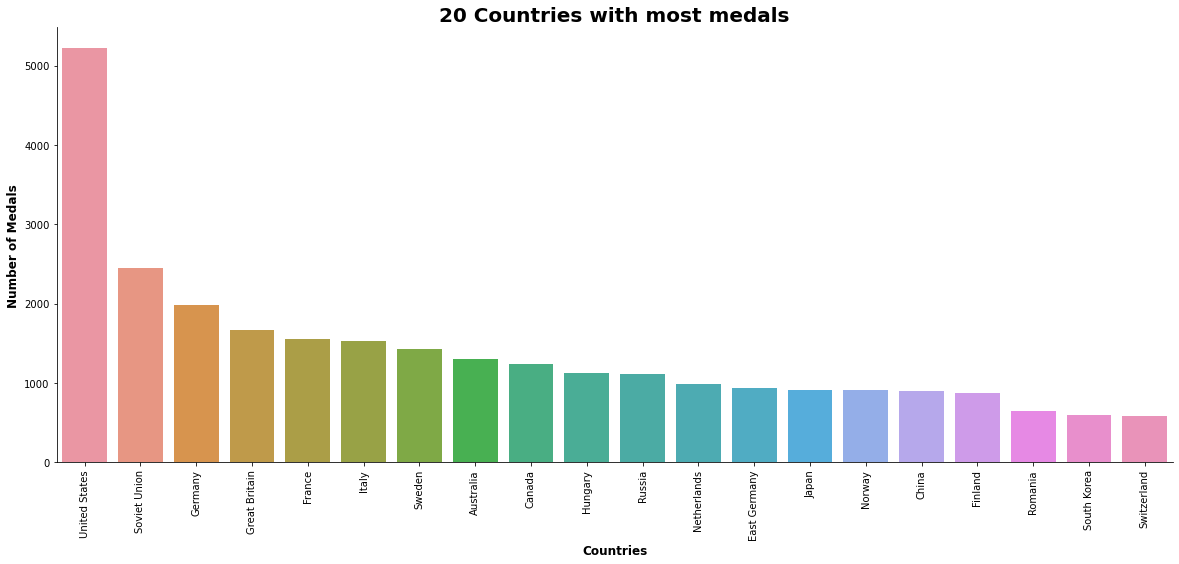

In [13]:
Medals_Per_Country = df_olympics.groupby(["Team","Medal"]).count().groupby(["Team"])["ID"].sum().sort_values(ascending=False).head(20)
plt.figure(figsize=(20,8))
sns.barplot(x = (Medals_Per_Country).index, y = Medals_Per_Country)
plt.xticks(rotation = 90, )
plt.ylabel('Number of Medals', fontsize=12, weight="bold")
plt.title('20 Countries with most medals', fontsize = 20, fontweight="bold")
plt.xlabel("Countries", fontsize=12, weight="bold")
sns.despine()
plt.show()

How many Events are in each sport ?

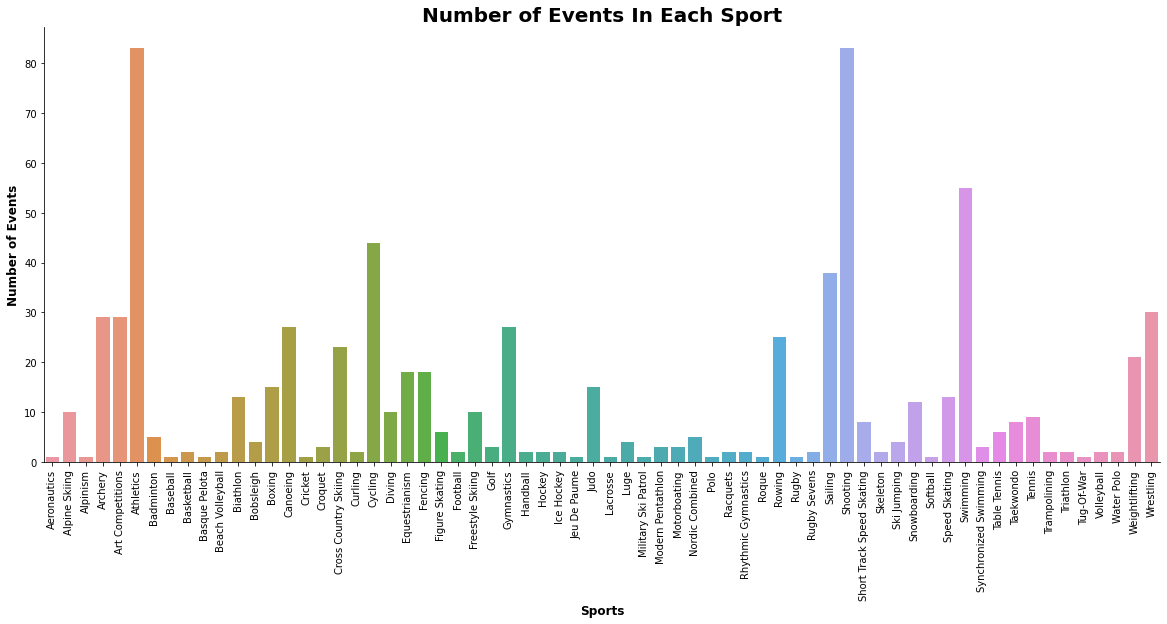

In [14]:
Unique_Events_Per_Sport = df_olympics.groupby(["Sport","Event"])["Event"].nunique().groupby(["Sport"]).sum()
plt.figure(figsize=(20,8))
sns.barplot(x = (Unique_Events_Per_Sport).index, y = Unique_Events_Per_Sport)
plt.xticks(rotation = 90, )
plt.ylabel('Number of Events', fontsize=12, weight="bold")
plt.title('Number of Events In Each Sport', fontsize = 20, fontweight="bold")
plt.xlabel("Sports", fontsize=12, weight="bold")
sns.despine()
plt.show()

The number of countries participating in the olympics throughout the years:

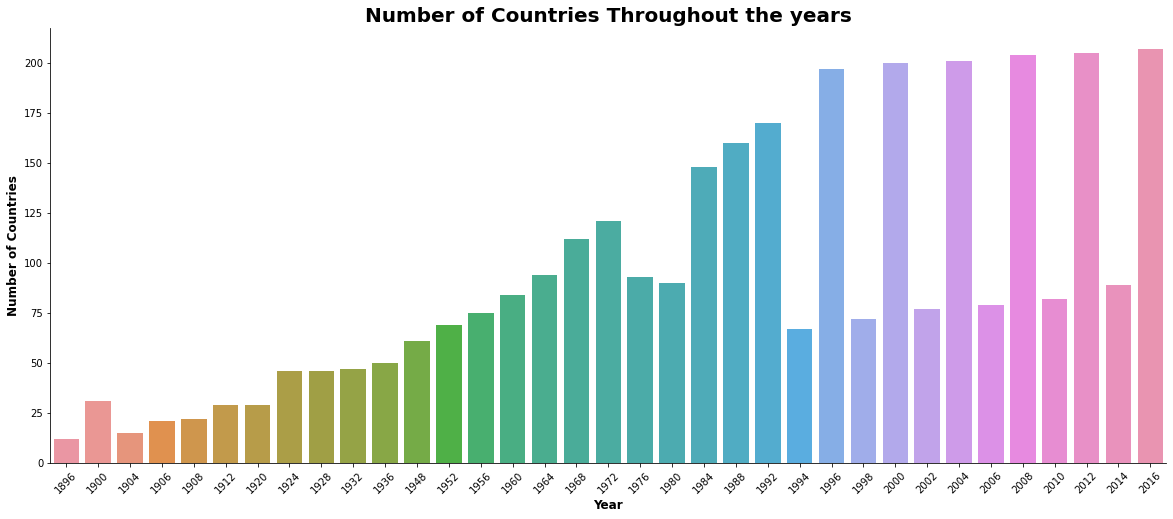

In [15]:
Unique_Countries_Per_Year = df_olympics.groupby(["Year","NOC"])["NOC"].nunique().groupby(["Year"]).sum()
plt.figure(figsize=(20,8))
sns.barplot(x = (Unique_Countries_Per_Year).index, y = Unique_Countries_Per_Year)
plt.xticks(rotation = 45, )
plt.ylabel('Number of Countries', fontsize=12, weight="bold")
plt.title('Number of Countries Throughout the years', fontsize = 20, fontweight="bold")
plt.xlabel("Year", fontsize=12, weight="bold")
sns.despine()
plt.show()

The Correlation between numeric variables:

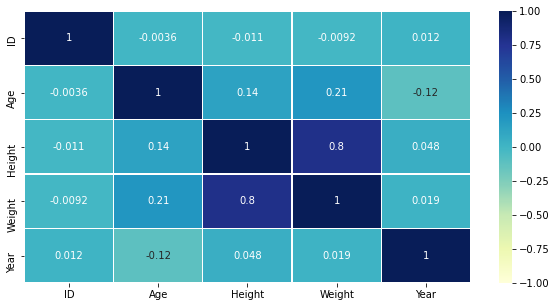

In [16]:
plt.figure(figsize=(10,5))
sns.heatmap(df_olympics.corr(), annot=True, cmap="YlGnBu", vmin=-1, vmax=1, linewidths=.2)

Checking for abnormalities in the values of each variable:

In [17]:
for col in df_olympics.columns:
    print('{} : {}'.format(col, df_olympics[col].unique()))

ID : [     1      2      3 ... 135569 135570 135571]
Name : ['A Dijiang' 'A Lamusi' 'Gunnar Nielsen Aaby' ... 'Andrzej ya' 'Piotr ya'
 'Tomasz Ireneusz ya']
Sex : ['M' 'F']
Age : [24. 23. 34. 21. 25. 27. 31. 33. 18. 26. 22. 30. 32. 28. 54. 20. 17. 43.
 47. 29. 41. 45. 49. 53. 57. nan 19. 38. 35. 16. 37. 15. 42. 46. 40. 36.
 14. 39. 48. 52. 44. 55. 50. 71. 63. 51. 58. 13. 60. 75. 65. 56. 64. 68.
 84. 12. 72. 59. 61. 70. 74. 62. 67. 69. 73. 66. 11. 76. 88. 96. 80. 10.
 81. 77. 97.]
Height : [180. 170.  nan 185. 188. 183. 168. 186. 182. 172. 159. 171. 184. 175.
 189. 176. 163. 187. 169. 174. 190. 194. 177. 167. 164. 198. 165. 156.
 179. 178. 166. 181. 155. 160. 173. 192. 195. 191. 203. 158. 154. 153.
 152. 193. 162. 197. 157. 207. 147. 150. 202. 161. 210. 205. 200. 148.
 208. 140. 213. 204. 151. 196. 146. 201. 132. 149. 199. 211. 215. 139.
 206. 135. 142. 217. 209. 145. 221. 144. 214. 143. 218. 127. 223. 216.
 141. 212. 131. 136. 137. 138. 220. 130. 219. 133. 128. 226.]
Weight : [ 80.    

# Handling Null Values

### Filling in Missing weights

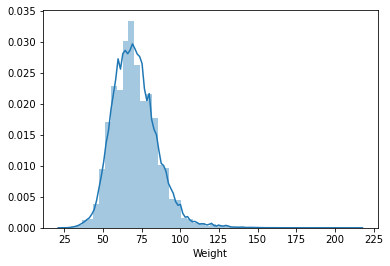

In [18]:
sns.distplot(df_olympics["Weight"])

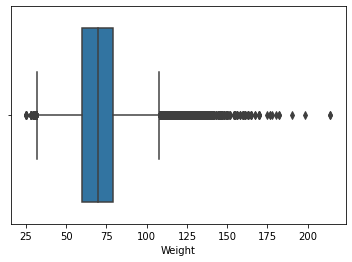

In [19]:
sns.boxplot(df_olympics["Weight"])

Here the distribution plot seems skewed to the right, and there are many outliers on the right according to the Box Plot, it might hint towards replacing the missing values using median. But a more precise way to replace missing values for weight might be to use the median weight from the event it belongs to, as there are events such as heavyweight and lightweight sports.

In [20]:
df_olympics_new = df_olympics.copy()
median_weight_for_event = df_olympics.groupby(["Event"])["Weight"].median()
for index,row in df_olympics.iterrows():
    if pd.isna(row["Weight"]):
        df_olympics_new.at[index, "Weight"] =  median_weight_for_event[row["Event"]]

In [21]:
df_olympics_new.isna().sum()["Weight"]

4660

Since there still remains some missing weights, then we will replace them by the median in the corresponding sport and gender.

In [22]:
median_weight_for_sport_gender = df_olympics.groupby(["Sport","Sex"])["Weight"].median()
for index,row in df_olympics_new.iterrows():
    if pd.isna(row["Weight"]):
        df_olympics_new.at[index, "Weight"] =  median_weight_for_sport_gender[row["Sport"]][row["Sex"]]

In [23]:
df_olympics_new.isna().sum()["Weight"]

282

Since there still remains some missing weights, then we will replace them by the median in their corresponding gender.

In [24]:
median_weight_for_gender = df_olympics.groupby(["Sex"])["Weight"].median()
for index,row in df_olympics_new.iterrows():
    if pd.isna(row["Weight"]):
        df_olympics_new.at[index, "Weight"] =  median_weight_for_gender[row["Sex"]]

In [25]:
df_olympics_new.isna().sum()["Weight"]

0

Distribution Plot of Weight After Filling in Missing Weights

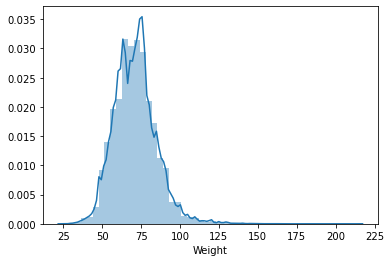

In [26]:
sns.distplot(df_olympics_new["Weight"])

### Filling in Missing Heights

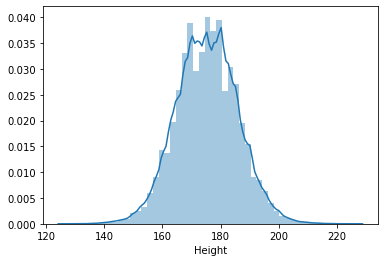

In [27]:
sns.distplot(df_olympics["Height"])

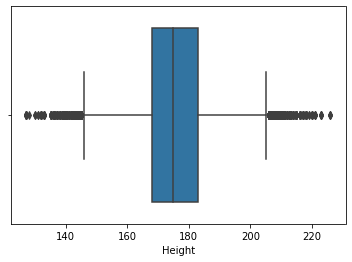

In [28]:
sns.boxplot(df_olympics["Height"])

In [29]:
df_olympics['Height'].mean()

175.33896987366376

In [30]:
df_olympics['Height'].median()

175.0

Here the distribution plot seems centered, and there are many outliers according to the Box Plot but they seem evenly distributed between both sides, so here we could use the mean or median to replace the null values especially since they are the same if rounded to the nearest integer. But a more precise way to replace missing values for height might be to use the median Height from the event it belongs to, as there are events such as Basketball where players are usually taller.

In [31]:
median_height_for_event = df_olympics.groupby(["Event"])["Height"].median()
for index,row in df_olympics.iterrows():
    if pd.isna(row["Height"]):
        df_olympics_new.at[index, "Height"] =  median_height_for_event[row["Event"]]

In [32]:
df_olympics_new.isna().sum()["Height"]

2083

Since there still remains some missing heights, then we will replace them by the median in the corresponding sport and gender.

In [33]:
median_height_for_sport_gender = df_olympics.groupby(["Sport","Sex"])["Height"].median()
for index,row in df_olympics_new.iterrows():
    if pd.isna(row["Height"]):
        df_olympics_new.at[index, "Height"] =  median_height_for_sport_gender[row["Sport"]][row["Sex"]]

In [34]:
df_olympics_new.isna().sum()["Height"]

100

Since there still remains some missing heights, then we will replace them by the median in their corresponding gender.

In [35]:
median_height_for_gender = df_olympics.groupby(["Sex"])["Height"].median()
for index,row in df_olympics_new.iterrows():
    if pd.isna(row["Height"]):
        df_olympics_new.at[index, "Height"] =  median_height_for_gender[row["Sex"]]

In [36]:
df_olympics_new.isna().sum()["Height"]

0

Distribution Plot of Age Height Filling in Missing Heights

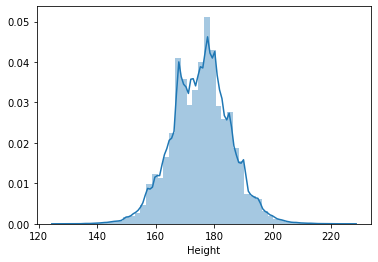

In [37]:
sns.distplot(df_olympics_new["Height"])

### Filling in Missing Age

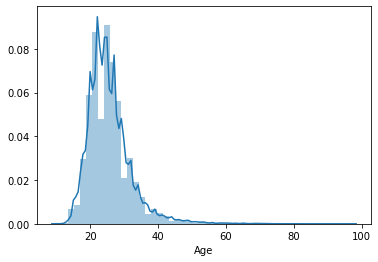

In [38]:
sns.distplot(df_olympics["Age"])

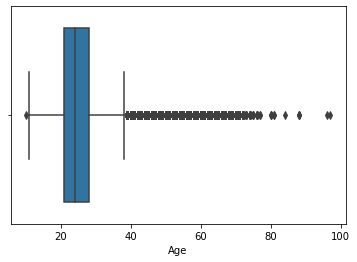

In [39]:
sns.boxplot(df_olympics["Age"])

In [40]:
df_olympics['Age'].mean()

25.556898357297374

In [41]:
df_olympics['Age'].median()

24.0

Here the distribution plot is clearly skewed to the right, and there are many outliers on the right according to the Box Plot, so it would be more appropriate here to replace null values with the median as it is more robust against outliers. But a more precise way to replace missing values for Age might be to use the median Age from the event it belongs to, some events might have younger athletes than others. But we will not use gender as a factor as it does not differentiate in the Age between athletes

In [42]:
median_age_for_event = df_olympics.groupby(["Event"])["Age"].median()
for index,row in df_olympics.iterrows():
    if pd.isna(row["Age"]):
        df_olympics_new.at[index, "Age"] =  median_age_for_event[row["Event"]]

In [43]:
df_olympics_new.isna().sum()["Age"]

142

Since there still remains some missing ages, then we will replace them by the median in the corresponding sport.

In [44]:
median_age_for_sport = df_olympics.groupby(["Sport"])["Age"].median()
for index,row in df_olympics.iterrows():
    if pd.isna(row["Age"]):
        df_olympics_new.at[index, "Age"] =  median_age_for_sport[row["Sport"]]

In [45]:
df_olympics_new.isna().sum()["Age"]

0

Distribution Plot of Age After Filling in Missing Age

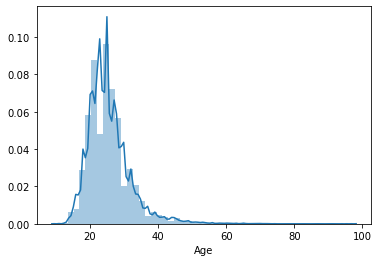

In [46]:
sns.distplot(df_olympics_new["Age"])

### Filling in Missing Medals

In [47]:
df_olympics_new['Medal'].unique()

array([nan, 'Gold', 'Bronze', 'Silver'], dtype=object)

In [48]:
df_olympics_new.isna().sum()["Medal"]

231333

As we can see here the only null values in the medals are for athletes who didn't receive them, so we will replace them with 'No Medal'.

In [49]:
df_olympics_new["Medal"].fillna(value="No Medal", inplace=True)

In [50]:
df_olympics_new.isna().sum()["Medal"]

0

In [51]:
df_olympics_new['Medal'].unique()

array(['No Medal', 'Gold', 'Bronze', 'Silver'], dtype=object)

Final Check on Missing Values:

In [52]:
df_olympics_new.isna().sum()

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64

# Handling Outliers

### Checking for outliers Weight and Height:

Removing outliers using z-score by event:

In [53]:
from scipy import stats
events = df_olympics_new["Event"].unique()
res = []
info = []
for event in events:
    temp = df_olympics_new[df_olympics_new["Event"]==event]
    tempShape = temp.shape
    tempH = np.abs(stats.zscore(temp['Height']))
    filtered_entries_H = tempH < 3
    temp = temp[filtered_entries_H]
    tempW = np.abs(stats.zscore(temp['Weight']))
    filtered_entries_W = tempW < 3
    temp = temp[filtered_entries_W]
    res.append(temp)
    info.append({"event":event,"numRemoved":tempShape[0]-temp.shape[0]})
df_olympics_afterOutliers = pd.DataFrame()
for df in res:
    df_olympics_afterOutliers = pd.concat([df_olympics_afterOutliers,df])
df_olympics_afterOutliers.sort_values(ascending=True,by="ID")

/Users/selim/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:2500: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd
<ipython-input-53-cfdfe7336a57>:12: RuntimeWarning: invalid value encountered in less
  filtered_entries_W = tempW < 3
<ipython-input-53-cfdfe7336a57>:9: RuntimeWarning: invalid value encountered in less
  filtered_entries_H = tempH < 3
/Users/selim/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:2497: RuntimeWarning: Mean of empty slice.
  mns = a.mean(axis=axis, keepdims=True)
/Users/selim/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:153: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/Users/selim/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:216: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/selim/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:185

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal
2,3,Gunnar Nielsen Aaby,M,24.0,178.0,73.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No Medal
3,4,Edgar Lindenau Aabye,M,34.0,182.0,95.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
17,6,Per Knut Aaland,M,33.0,188.0,75.0,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 4 x 10 kilometres R...,No Medal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,No Medal
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",No Medal
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",No Medal
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,No Medal


In [54]:
df_olympics_afterOutliers.shape

(259271, 15)

### Checking for outliers in Events:

First lets see the events with the least amount of athletes

In [55]:
athletes_per_event = df_olympics_afterOutliers.groupby(["Event"])["ID"].count()
athletes_per_event_sorted = athletes_per_event.sort_values(ascending=True)
athletes_per_event_sorted.head(10)

Event
Weightlifting Men's All-Around Dumbbell Contest    3
Wrestling Men's Unlimited Class, Greco-Roman       5
Motorboating Mixed B-Class (Under 60 Feet)         5
Art Competitions Mixed Music, Vocals               5
Athletics Men's 2,500 metres Steeplechase          6
Swimming Men's 100 yard Freestyle                  6
Swimming Men's 50 yard Freestyle                   6
Athletics Men's All-Around Championship            7
Athletics Men's Shot Put, Both Hands               7
Athletics Men's 2,590 metres Steeplechase          7
Name: ID, dtype: int64

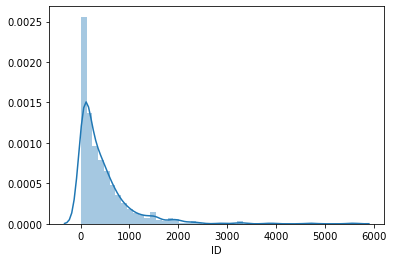

In [56]:
sns.distplot(df_olympics_afterOutliers.groupby(["Event"])["ID"].count())

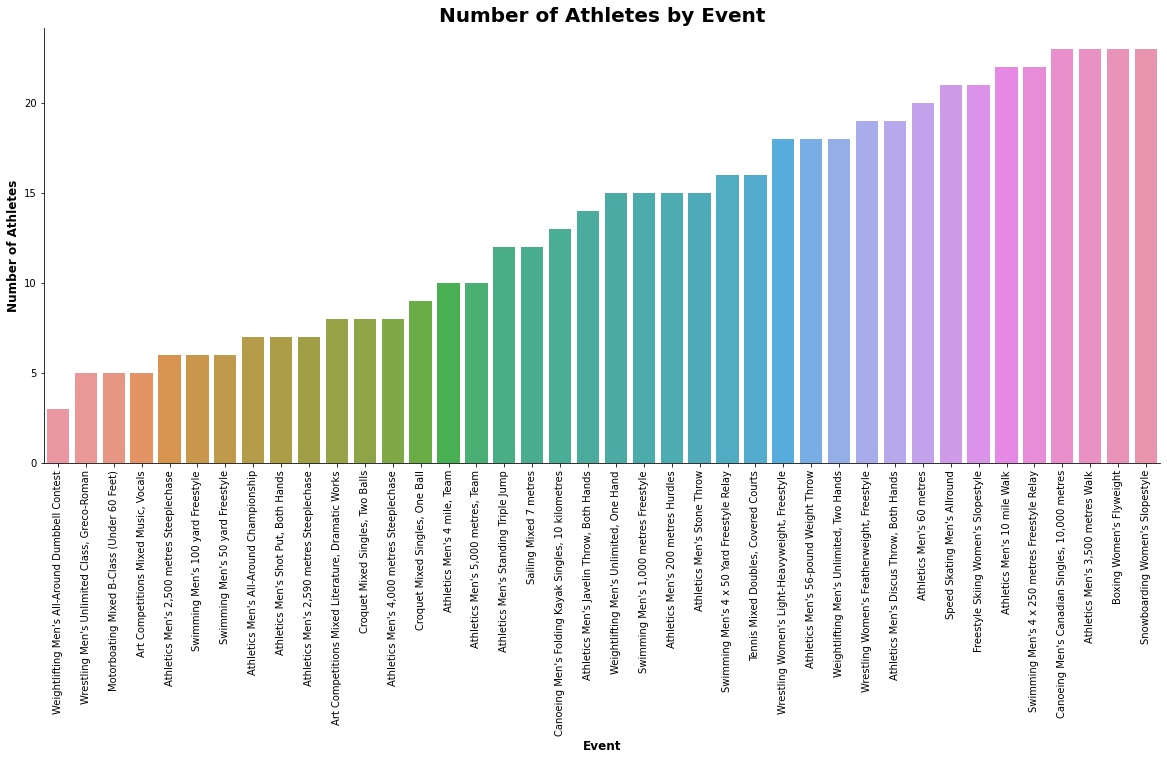

In [57]:
plt.figure(figsize=(20,8))
sns.barplot(x = (athletes_per_event_sorted.head(40)).index, y = athletes_per_event_sorted.head(40))
plt.xlabel('Event')
plt.xticks(rotation = 90, )
plt.ylabel('Number of Athletes', fontsize=12, weight="bold")
plt.title('Number of Athletes by Event', fontsize = 20, fontweight="bold")
plt.xlabel("Event", fontsize=12, weight="bold")
sns.despine()
plt.show()

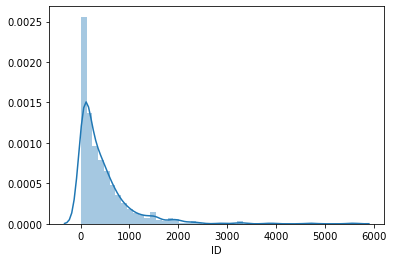

In [58]:
sns.distplot(athletes_per_event_sorted)

In [59]:
from scipy import stats

z = np.abs(stats.zscore(athletes_per_event_sorted))

In [60]:
filtered_entries = z < 3
filtered_entries

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [61]:
df_zscore_filter = athletes_per_event_sorted[filtered_entries]

In [62]:
print(athletes_per_event_sorted.shape)
print(df_zscore_filter.shape)
print(athletes_per_event_sorted.shape[0]-df_zscore_filter.shape[0])

(567,)
(557,)
10


We will not remove Event Outliers as if we do so using the Boxplot Method or Z-score, it will remove the 15 most participated in events, and will leave all the events with less than 10 or less than 2 athletes.

### Checking for outliers in Age:

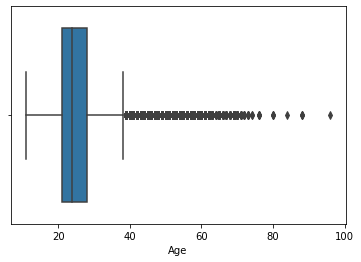

In [63]:
sns.boxplot(df_olympics_afterOutliers['Age'])

In [64]:
Q1 = df_olympics_afterOutliers['Age'].quantile(0.25)
Q3 = df_olympics_afterOutliers['Age'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

7.0


In [65]:
cut_off = IQR * 1.5
lower = Q1 - cut_off
upper =  Q3 + cut_off
print(lower,upper)

10.5 38.5


In [66]:
df1 = df_olympics_afterOutliers[df_olympics_afterOutliers['Age']> upper]
df2 = df_olympics_afterOutliers[df_olympics_afterOutliers['Age'] < lower]
print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

Total number of outliers are 7808


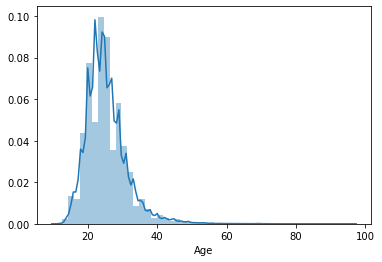

In [67]:
sns.distplot(df_olympics_afterOutliers['Age'])

In [68]:
from scipy import stats

z = np.abs(stats.zscore(df_olympics_afterOutliers['Age']))
z

array([0.22013849, 0.97581526, 0.63411419, ..., 0.04928795, 0.7326901 ,
       0.04928795])

In [69]:
filtered_entries = z < 3
filtered_entries

array([ True,  True,  True, ...,  True,  True,  True])

Removing Outliers using z-score would be a better fit because as seen below it removes data evenly from both sides of the distribution plot:

In [70]:
df_olympics_afterOutliers = df_olympics_afterOutliers[filtered_entries]

In [71]:
print(df_olympics_afterOutliers.shape)
print(df_zscore_filter.shape)
print(df_olympics_afterOutliers.shape[0]-df_zscore_filter.shape[0])

(255207, 15)
(557,)
254650


# Attempting to learn insights for questions

Finding out who are the top Medal Winners

In [72]:
df_athletes = df_olympics_afterOutliers[df_olympics_afterOutliers['Medal']!='No Medal']

In [73]:
df_topathletes = df_athletes.groupby(['Name'])['Medal'].count()
df_topathletes = df_topathletes.sort_values(ascending=False)

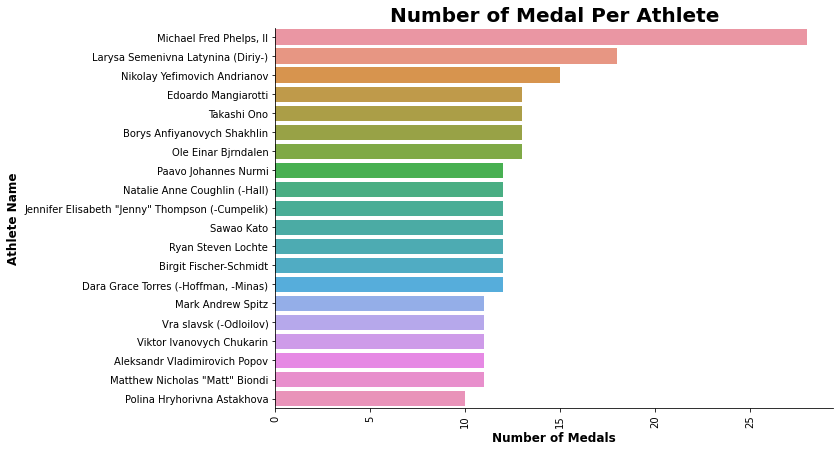

In [74]:
plt.figure(figsize=(10,7))
sns.barplot(y = df_topathletes.head(20).index, x = df_topathletes.head(20))
plt.xlabel('Number of Medals')
plt.xticks(rotation = 90, )
plt.ylabel('Athlete Name', fontsize=12, weight="bold")
plt.title('Number of Medal Per Athlete', fontsize = 20, fontweight="bold")
plt.xlabel("Number of Medals", fontsize=12, weight="bold")
sns.despine()
plt.show()

Top Perorming country in Every Sport

In [75]:
# most successful country in every event
df_topCountryPerSport = df_olympics_afterOutliers[df_olympics_afterOutliers["Medal"]!="No Medal"]
df_topCountryPerSport = df_topCountryPerSport.groupby(["Sport","NOC"]).agg({"Medal":'count'})
df_topCountryPerSport = df_topCountryPerSport['Medal'].groupby('Sport', group_keys=False)

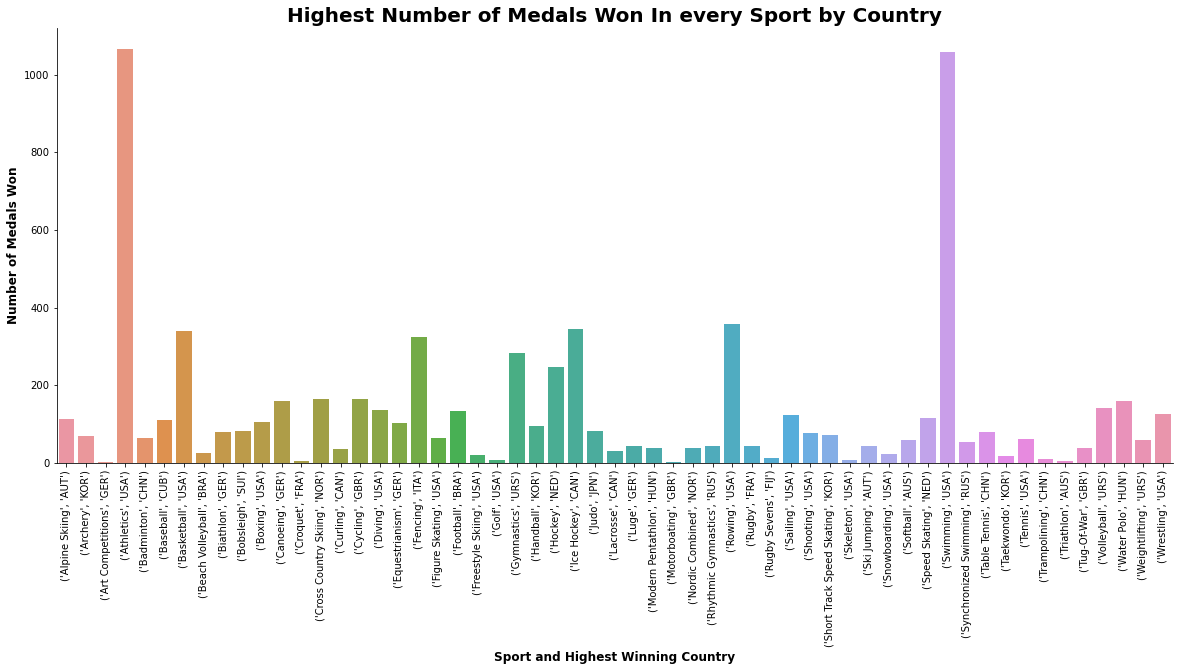

In [76]:
plt.figure(figsize=(20,8))
sns.barplot(x = (df_topCountryPerSport.nlargest(1)).index, y = df_topCountryPerSport.nlargest(1))
plt.xlabel('Sport and Highest Winning Country')
plt.xticks(rotation = 90, )
plt.ylabel('Number of Medals Won', fontsize=12, weight="bold")
plt.title('Highest Number of Medals Won In every Sport by Country', fontsize = 20, fontweight="bold")
plt.xlabel("Sport and Highest Winning Country", fontsize=12, weight="bold")
sns.despine()
plt.show()

Top Performing Athlete In Every Sport

In [77]:
# most successful athlete in every event
df_topAthletePerSport = df_olympics_afterOutliers[df_olympics_afterOutliers["Medal"]!="No Medal"]
df_topAthletePerSport = df_topAthletePerSport.groupby(["Sport","Name"]).agg({"Medal":'count'})
df_topAthletePerSport = df_topAthletePerSport['Medal'].groupby('Sport', group_keys=False)

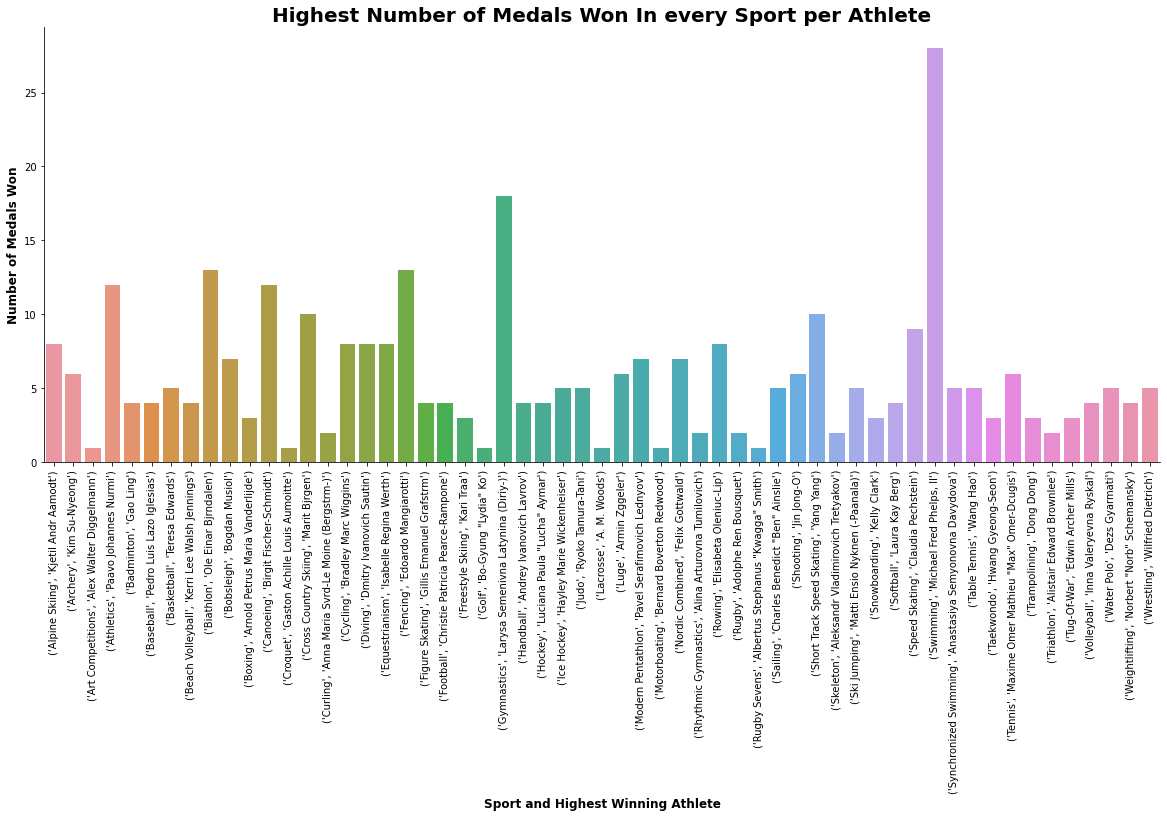

In [78]:
plt.figure(figsize=(20,8))
sns.barplot(x = (df_topAthletePerSport.nlargest(1)).index, y = df_topAthletePerSport.nlargest(1))
plt.xlabel('Sport and Highest Winning Athlete')
plt.xticks(rotation = 90, )
plt.ylabel('Number of Medals Won', fontsize=12, weight="bold")
plt.title('Highest Number of Medals Won In every Sport per Athlete', fontsize = 20, fontweight="bold")
plt.xlabel("Sport and Highest Winning Athlete", fontsize=12, weight="bold")
sns.despine()
plt.show()

Participation in the Olympics by gender throughout the years

In [79]:
df_maleathletes_year = df_olympics_afterOutliers[df_olympics_afterOutliers["Sex"]=="M"]
df_maleathletes_year = df_maleathletes_year.groupby(['Year'])['Sex'].count()
df_femaleathletes_year = df_olympics_afterOutliers[df_olympics_afterOutliers["Sex"]=="F"]
df_femaleathletes_year = df_femaleathletes_year.groupby(['Year'])['Sex'].count()

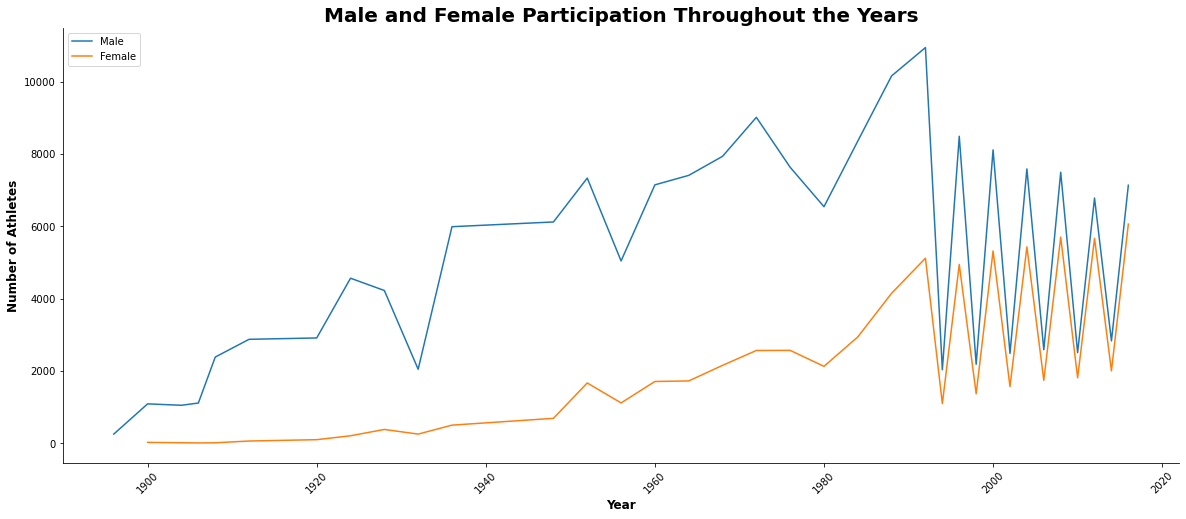

In [80]:
plt.figure(figsize=(20,8))
labels = ["Male", "Female"]
plt.plot((df_maleathletes_year).index,df_maleathletes_year)
plt.plot((df_femaleathletes_year).index,df_femaleathletes_year)
plt.xticks(rotation = 45, )
plt.ylabel('Number of Athletes', fontsize=12, weight="bold")
plt.title('Male and Female Participation Throughout the Years', fontsize = 20, fontweight="bold")
plt.xlabel("Year", fontsize=12, weight="bold")
plt.legend(labels=labels, loc="upper left")
sns.despine()
plt.show()

Change In the Number of Athletes by Sport Throughout the Years

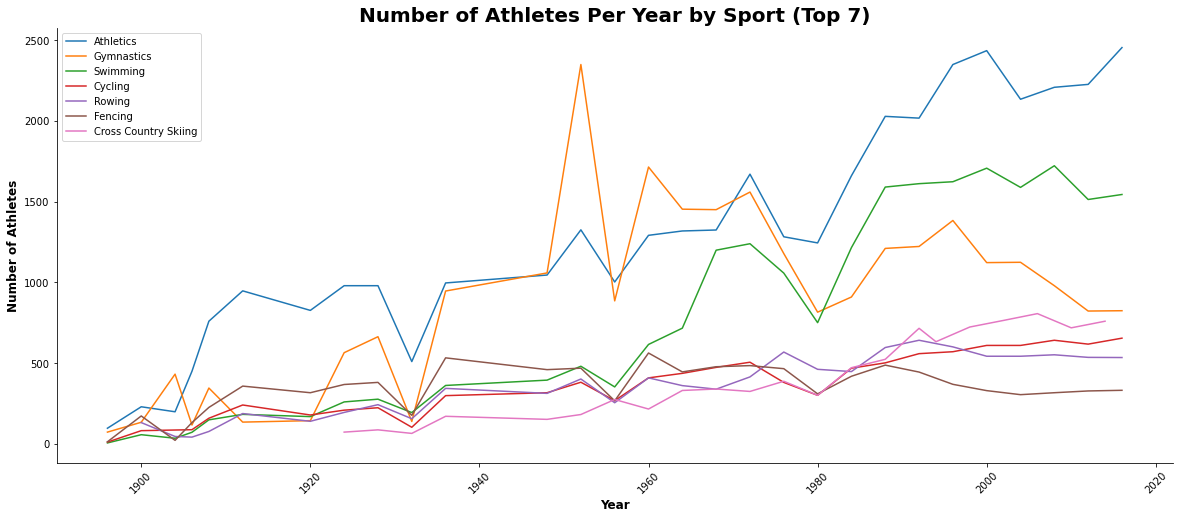

In [81]:
labels = df_olympics_afterOutliers.groupby("Sport")["ID"].count().sort_values(ascending=False).index[0:7]
plt.figure(figsize=(20,8))
for sport in labels:
    df_sport_year = df_olympics_afterOutliers[df_olympics_afterOutliers["Sport"]==sport]
    df_sport_year = df_sport_year.groupby(['Year'])['ID'].count()
    plt.plot((df_sport_year).index,df_sport_year)
plt.xticks(rotation = 45, )
plt.ylabel('Number of Athletes', fontsize=12, weight="bold")
plt.title('Number of Athletes Per Year by Sport (Top 7)', fontsize = 20, fontweight="bold")
plt.xlabel("Year", fontsize=12, weight="bold")
plt.legend(labels=labels, loc="upper left")
sns.despine()
plt.show()

Change In the Average Age of Athletes by Sport Throughout the Years

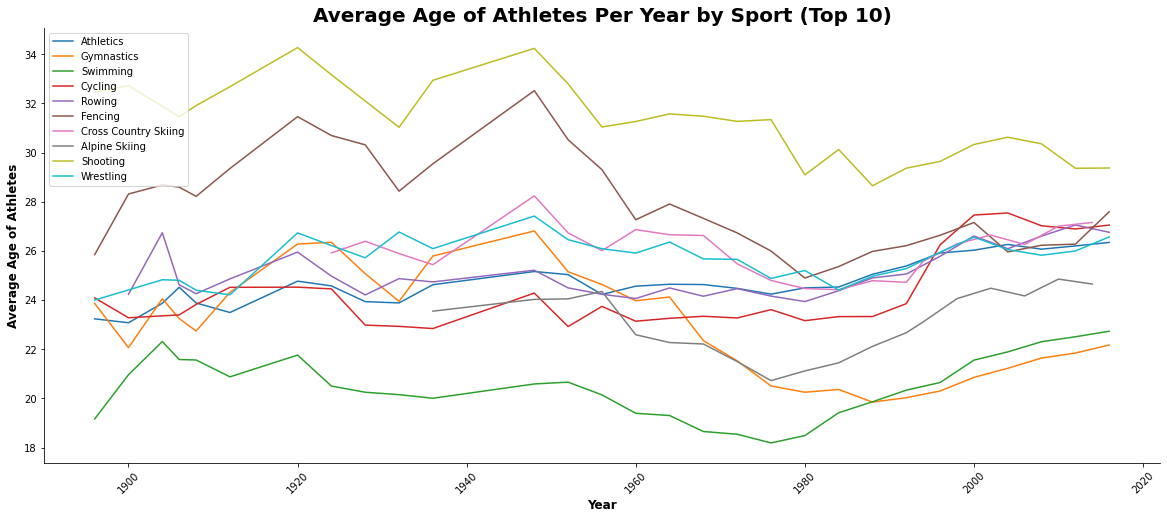

In [88]:
labels = df_olympics_afterOutliers.groupby("Sport")["ID"].count().sort_values(ascending=False).index[0:10]
plt.figure(figsize=(20,8))
for sport in labels:
    df_sport_year = df_olympics_afterOutliers[df_olympics_afterOutliers["Sport"]==sport]
    df_sport_year = df_sport_year.groupby(['Year'])['Age'].mean()
    plt.plot((df_sport_year).index,df_sport_year)
plt.xticks(rotation = 45, )
plt.ylabel('Average Age of Athletes', fontsize=12, weight="bold")
plt.title('Average Age of Athletes Per Year by Sport (Top 10)', fontsize = 20, fontweight="bold")
plt.xlabel("Year", fontsize=12, weight="bold")
plt.legend(labels=labels, loc="upper left")
sns.despine()
plt.show()